<a href="https://colab.research.google.com/github/hllj/simple-fashion-mnist/blob/main/FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf

# Read dataset and preprocessing to train-val-test set:

In [2]:
DATA_PATH = '/content/drive/My Drive/Dataset/FashionMNIST'

IMG_COL = 28
IMG_ROW = 28

IMG_SHAPE = (IMG_COL, IMG_ROW, 1)

RANDOM_STATE = 34
BATCH_SIZE = 32
EPOCHS = 50

In [3]:
df_train = pd.read_csv(DATA_PATH + '/fashion-mnist_train.csv')
df_test = pd.read_csv(DATA_PATH + '/fashion-mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


## Create train - val - test set:

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X = np.array(df_train.iloc[:, 1:])
y = np.array(df_train.iloc[:, 0])

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=RANDOM_STATE)

X_test = np.array(df_test.iloc[:, 1:])
y_test = np.array(df_test.iloc[:, 0])

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Show some images from train - val - test:

In [7]:
def show_image(x, y):
  image = x.reshape(IMG_ROW, IMG_COL)
  plt.imshow(image)
  category = class_names[y]
  plt.title('Category: {}'.format(category))

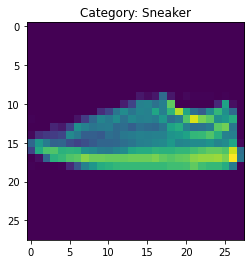

In [8]:
show_image(X_train[0], y_train[0])

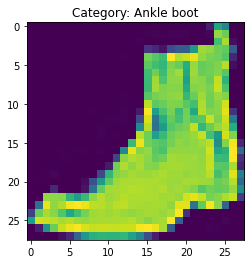

In [9]:
show_image(X_val[0], y_val[0])

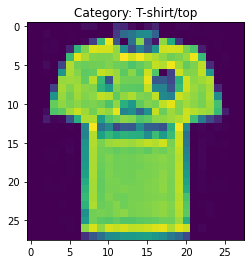

In [10]:
show_image(X_test[0], y_test[0])

## Preprocessing for Training:

In [11]:
# Normalize image
X_train = X_train.reshape(X_train.shape[0], IMG_ROW, IMG_COL, 1)
X_test = X_test.reshape(X_test.shape[0], IMG_ROW, IMG_COL, 1)
X_val = X_val.reshape(X_val.shape[0], IMG_ROW, IMG_COL, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [12]:
train_label = tf.keras.utils.to_categorical(y_train, len(class_names))
val_label = tf.keras.utils.to_categorical(y_val, len(class_names))
test_label = tf.keras.utils.to_categorical(y_test, len(class_names))


# Train model:

## Train a simple Neural network:

In [13]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=IMG_SHAPE))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Create callback for saving the best model
mc = tf.keras.callbacks.ModelCheckpoint(filepath="model.h5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0, 
                                     save_best_only=True)

In [17]:
history = model.fit(x=X_train, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[mc], validation_data=(X_val, val_label))

Epoch 1/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5250 - accuracy: 0.8143 - val_loss: 0.4297 - val_accuracy: 0.8524
Epoch 2/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3972 - accuracy: 0.8593 - val_loss: 0.3811 - val_accuracy: 0.8617
Epoch 3/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3547 - accuracy: 0.8729 - val_loss: 0.3918 - val_accuracy: 0.8610
Epoch 4/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3284 - accuracy: 0.8807 - val_loss: 0.3462 - val_accuracy: 0.8751
Epoch 5/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3095 - accuracy: 0.8873 - val_loss: 0.3571 - val_accuracy: 0.8697
Epoch 6/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2933 - accuracy: 0.8926 - val_loss: 0.3296 - val_accuracy: 0.8787
Epoch 7/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.2803 - accuracy: 0.8955 - val_loss: 0.3492 - val_accuracy:

In [18]:
def show_history_training(history, epochs):
  history_dict = history.history
  loss_values = history_dict['loss']
  val_loss_values = history_dict['val_loss']

  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']

  plt.figure(figsize=(20, 15))

  plt.subplot(2, 1, 1)
  plt.plot(epochs, loss_values, 'r', label='Training loss')
  plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()


  plt.subplot(2, 1, 2)
  plt.plot(epochs, acc_values, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

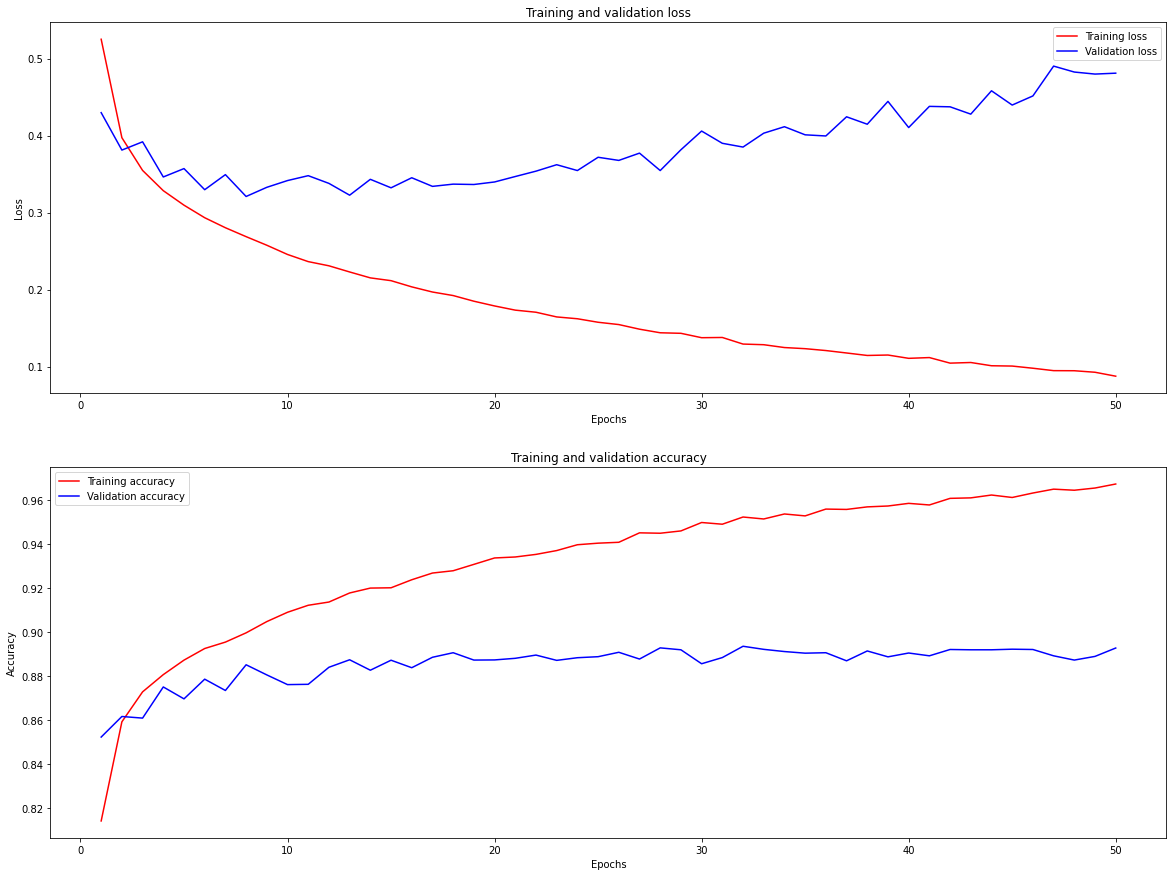

In [19]:
show_history_training(history, range(1, EPOCHS + 1))

**This model is over-fitting with the data**

Solution:


*   Need more data (we can not have more data).
*   Add regularization



## Model with L2 Regularization:

In [20]:
L2_REG = 0.01

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=IMG_SHAPE))
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(L2_REG)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(x=X_train, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[mc], validation_data=(X_val, val_label))

Epoch 1/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.9336 - accuracy: 0.7867 - val_loss: 0.6794 - val_accuracy: 0.7957
Epoch 2/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6698 - accuracy: 0.8052 - val_loss: 0.6433 - val_accuracy: 0.8177
Epoch 3/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6447 - accuracy: 0.8090 - val_loss: 0.6162 - val_accuracy: 0.8286
Epoch 4/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6263 - accuracy: 0.8187 - val_loss: 0.6361 - val_accuracy: 0.8109
Epoch 5/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6161 - accuracy: 0.8188 - val_loss: 0.6098 - val_accuracy: 0.8303
Epoch 6/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.6063 - accuracy: 0.8228 - val_loss: 0.6098 - val_accuracy: 0.8245
Epoch 7/50
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5923 - accuracy: 0.8273 - val_loss: 0.5882 - val_accuracy:

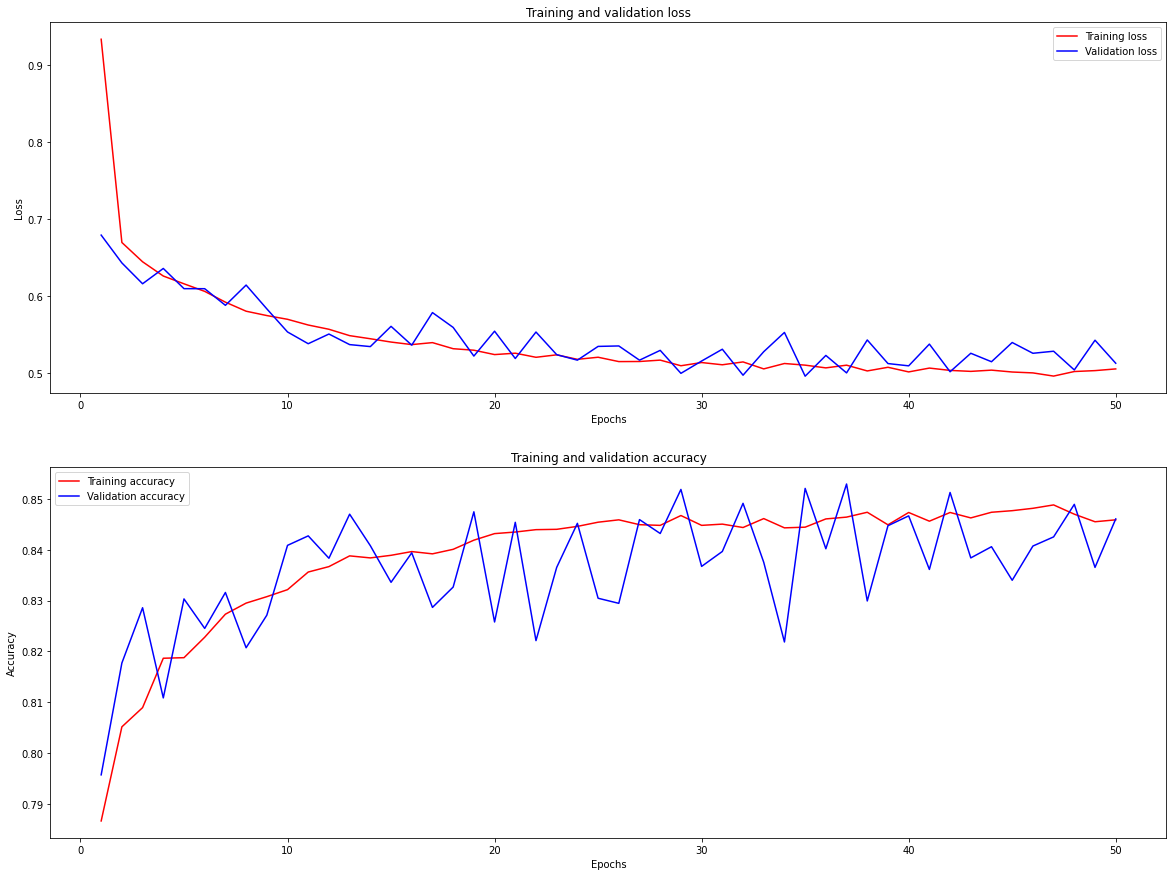

In [25]:
show_history_training(history, range(1, EPOCHS + 1))

**In this situation, We reduce overfitting for model, but the loss and accuracy is not good enough. So we need a way more complex model. I suggest using a CNN structure.**

## Model with CNN structure:

In [26]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [28]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
history = model.fit(x=X_train, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[mc], validation_data=(X_val, val_label))

Epoch 1/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4748 - accuracy: 0.8278 - val_loss: 0.3816 - val_accuracy: 0.8590
Epoch 2/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3142 - accuracy: 0.8850 - val_loss: 0.3157 - val_accuracy: 0.8804
Epoch 3/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2637 - accuracy: 0.9040 - val_loss: 0.2888 - val_accuracy: 0.8918
Epoch 4/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2285 - accuracy: 0.9159 - val_loss: 0.2718 - val_accuracy: 0.9006
Epoch 5/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2016 - accuracy: 0.9259 - val_loss: 0.2722 - val_accuracy: 0.9026
Epoch 6/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1751 - accuracy: 0.9357 - val_loss: 0.2776 - val_accuracy: 0.9042
Epoch 7/50
1407/1407 [==============================] - 5s 4ms/step - loss: 0.1546 - accuracy: 0.9408 - val_loss: 0.2726 - val_accuracy:

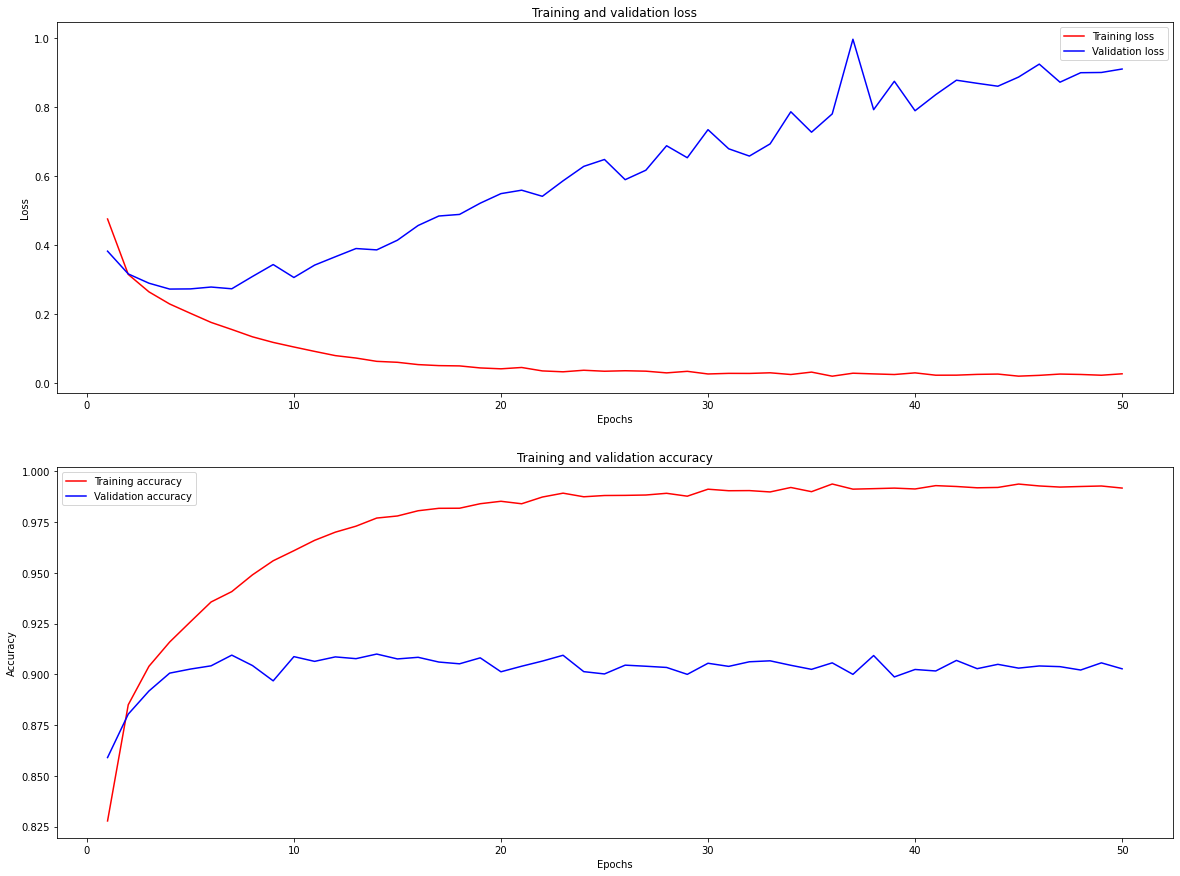

In [30]:
show_history_training(history, range(1, EPOCHS + 1))

**In this situation, we have a overfitting model, in CNN structure model, we can use Dropout for regularization.**

So the solution by far is using dropout for Fully connected layer and L2 regularization for CNN layer.

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=IMG_SHAPE))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.4))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)        

In [33]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(x=X_train, y=train_label, batch_size=BATCH_SIZE, epochs=EPOCHS, callbacks=[mc], validation_data=(X_val, val_label))

Epoch 1/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.6587 - accuracy: 0.7562 - val_loss: 0.4168 - val_accuracy: 0.8471
Epoch 2/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.4188 - accuracy: 0.8508 - val_loss: 0.3451 - val_accuracy: 0.8693
Epoch 3/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3624 - accuracy: 0.8728 - val_loss: 0.3003 - val_accuracy: 0.8899
Epoch 4/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3330 - accuracy: 0.8833 - val_loss: 0.3008 - val_accuracy: 0.8892
Epoch 5/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3097 - accuracy: 0.8902 - val_loss: 0.2817 - val_accuracy: 0.8975
Epoch 6/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2958 - accuracy: 0.8948 - val_loss: 0.2698 - val_accuracy: 0.9028
Epoch 7/50
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2867 - accuracy: 0.8970 - val_loss: 0.2557 - val_accuracy:

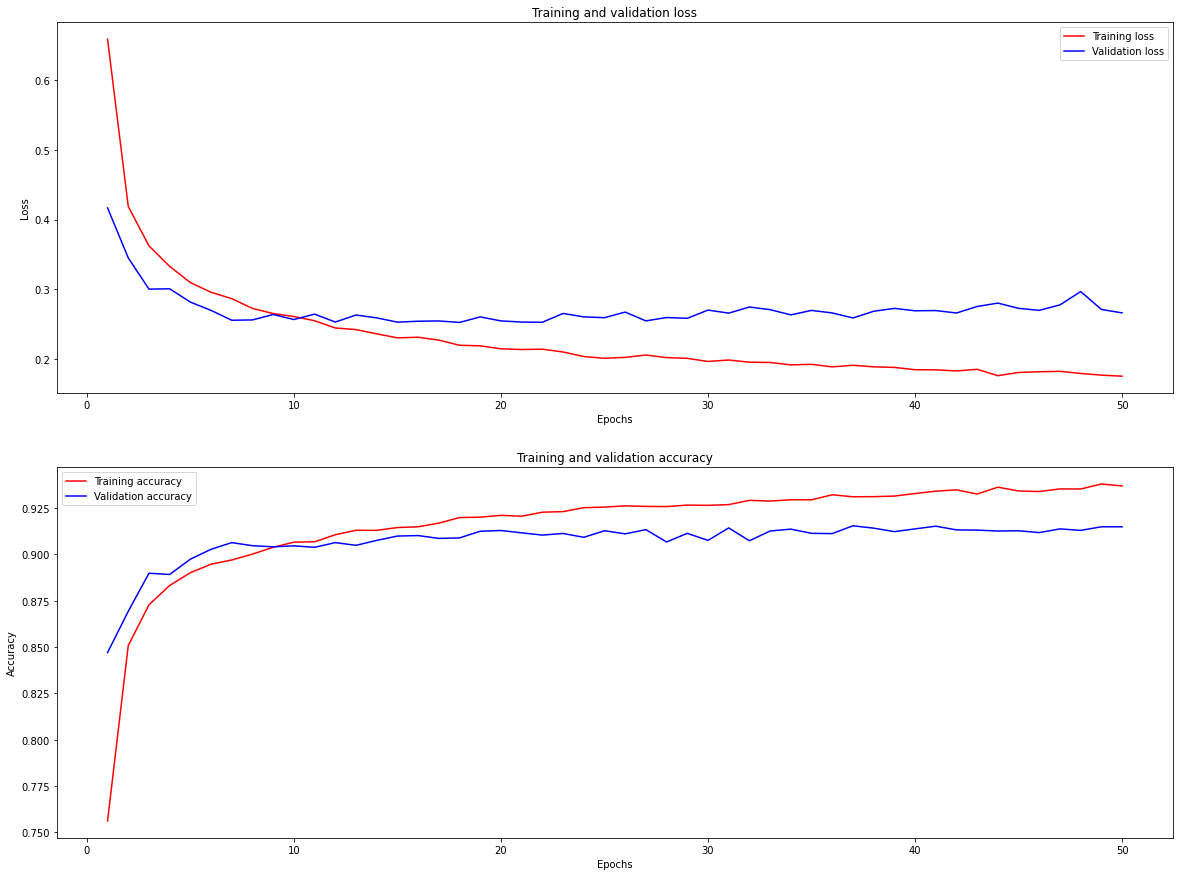

In [35]:
show_history_training(history, range(1, EPOCHS + 1))

# Load the best model:

In [38]:
best_model = tf.keras.models.load_model('model.h5')

In [40]:
[test_loss, test_acc] = best_model.evaluate(X_test, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.2414 - accuracy: 0.9135


In [41]:
print("Loss score in Test set {}".format(test_loss))
print("Accuracy in Test set {}".format(test_acc))

Loss score in Test set 0.24139641225337982
Accuracy in Test set 0.9135000109672546
